In [1]:
!pwd

/home/jupyter/drone/transfer


In [3]:
%cd .. 
%cd coco
!bash get_coco_dataset_images.sh

/home/jupyter/drone
/home/jupyter/drone/coco
--2019-08-23 17:43:19--  https://pjreddie.com/media/files/train2014.zip
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510435630 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  18.3MB/s    in 8m 48s  

2019-08-23 17:52:07 (24.4 MB/s) - ‘train2014.zip’ saved [13510435630/13510435630]

--2019-08-23 17:52:07--  https://pjreddie.com/media/files/val2014.zip
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  29.1MB/s    in 4m 13s  

2019-08-23 17:56:20 (25.1 MB/s) - ‘val2014.zip’ saved [6645013297/664501

In [4]:
!bash unzip_annotations.sh 

Fix archive (-F) - assume mostly intact archive
 copying: instances_train2014.json
  error:  invalid compressed data to inflate instances_train2014.json


In [1]:
import time
import glob
import torch
import os 
from IPython.display import Image, clear_output
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.1.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [2]:
!pip install cython
!pip install nvidia-ml-py3
!pip install -U -r requirements.txt

  Stored in directory: /home/jupyter/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
Successfully built nvidia-ml-py3
    100% |████████████████████████████████| 20.3MB 2.2MB/s 
Requirement already up-to-date: opencv-python in /opt/anaconda3/lib/python3.7/site-packages (from -r requirements.txt (line 7)) (4.1.0.25)
    100% |████████████████████████████████| 748.9MB 58kB/s 
Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(104, 'ECONNRESET')"))': /simple/matplotlib/
    100% |████████████████████████████████| 13.1MB 5.1MB/s 
    100% |████████████████████████████████| 1.5MB 24.5MB/s 
    100% |████████████████████████████████| 51kB 20.5MB/s 
    100% |████████████████████████████████| 3.8MB 11.6MB/s 
Requirement already up-to-date: future in /opt/anaconda3/lib/python3.7/site-packages (from -r requirements.txt (line 13)) (0.17.1)
    100% |███████████████

In [17]:
!sudo python3 train.py --cfg cfg/plane-drone.cfg --epochs 10 --batch-size 5 --data data/plane_drone_val.data

Namespace(accumulate=2, batch_size=5, bucket='', cache_images=False, cfg='cfg/plane-drone.cfg', data='data/plane_drone_val.data', epochs=10, evolve=False, img_size=416, img_weights=False, multi_scale=False, nosave=False, notest=False, num_workers=16, rect=False, resume=False, transfer=False, xywh=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

data/plane_drone_train.txt
[]
Model Summary: 222 layers, 6.15291e+07 parameters, 6.15291e+07 gradients

     Epoch   gpu_mem   GIoU/xy        wh       obj       cls     total   targets  img_size
       0/9      1.3G     0.201         0     0.706      4.54      5.45         1       416: 100%|█| 143/143 [00:32<00:00,  1.44it/s]
data/plane_drone_val.txt
[]
                         Class    Images   Targets         P         R       mAP        F1: 100%|█| 61/61 [00:11<00:00,  2.75it/s]
                           all       301       418    0.0256   0.00376  0.000388   0.00656

     Epoch   gpu_mem   

In [29]:
!sudo python3 test.py --data data/plane_drone_train_val.data --cfg cfg/plane-drone.cfg --weights weights/best.pt --img-size 416 --batch-size 5

Namespace(batch_size=5, cfg='cfg/plane-drone.cfg', conf_thres=0.001, data='data/plane_drone_train_val.data', img_size=416, iou_thres=0.5, nms_thres=0.5, save_json=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

data/plane_drone_val.txt
[]
                         Class    Images   Targets         P         R       mAP        F1: 100%|█| 61/61 [00:49<00:00,  1.06it/s]
                           all       301       418   0.00329     0.179   0.00269   0.00645
                         drone       301       152  0.000403    0.0461   0.00135  0.000798
                      airplane       301       266   0.00617     0.312   0.00403    0.0121


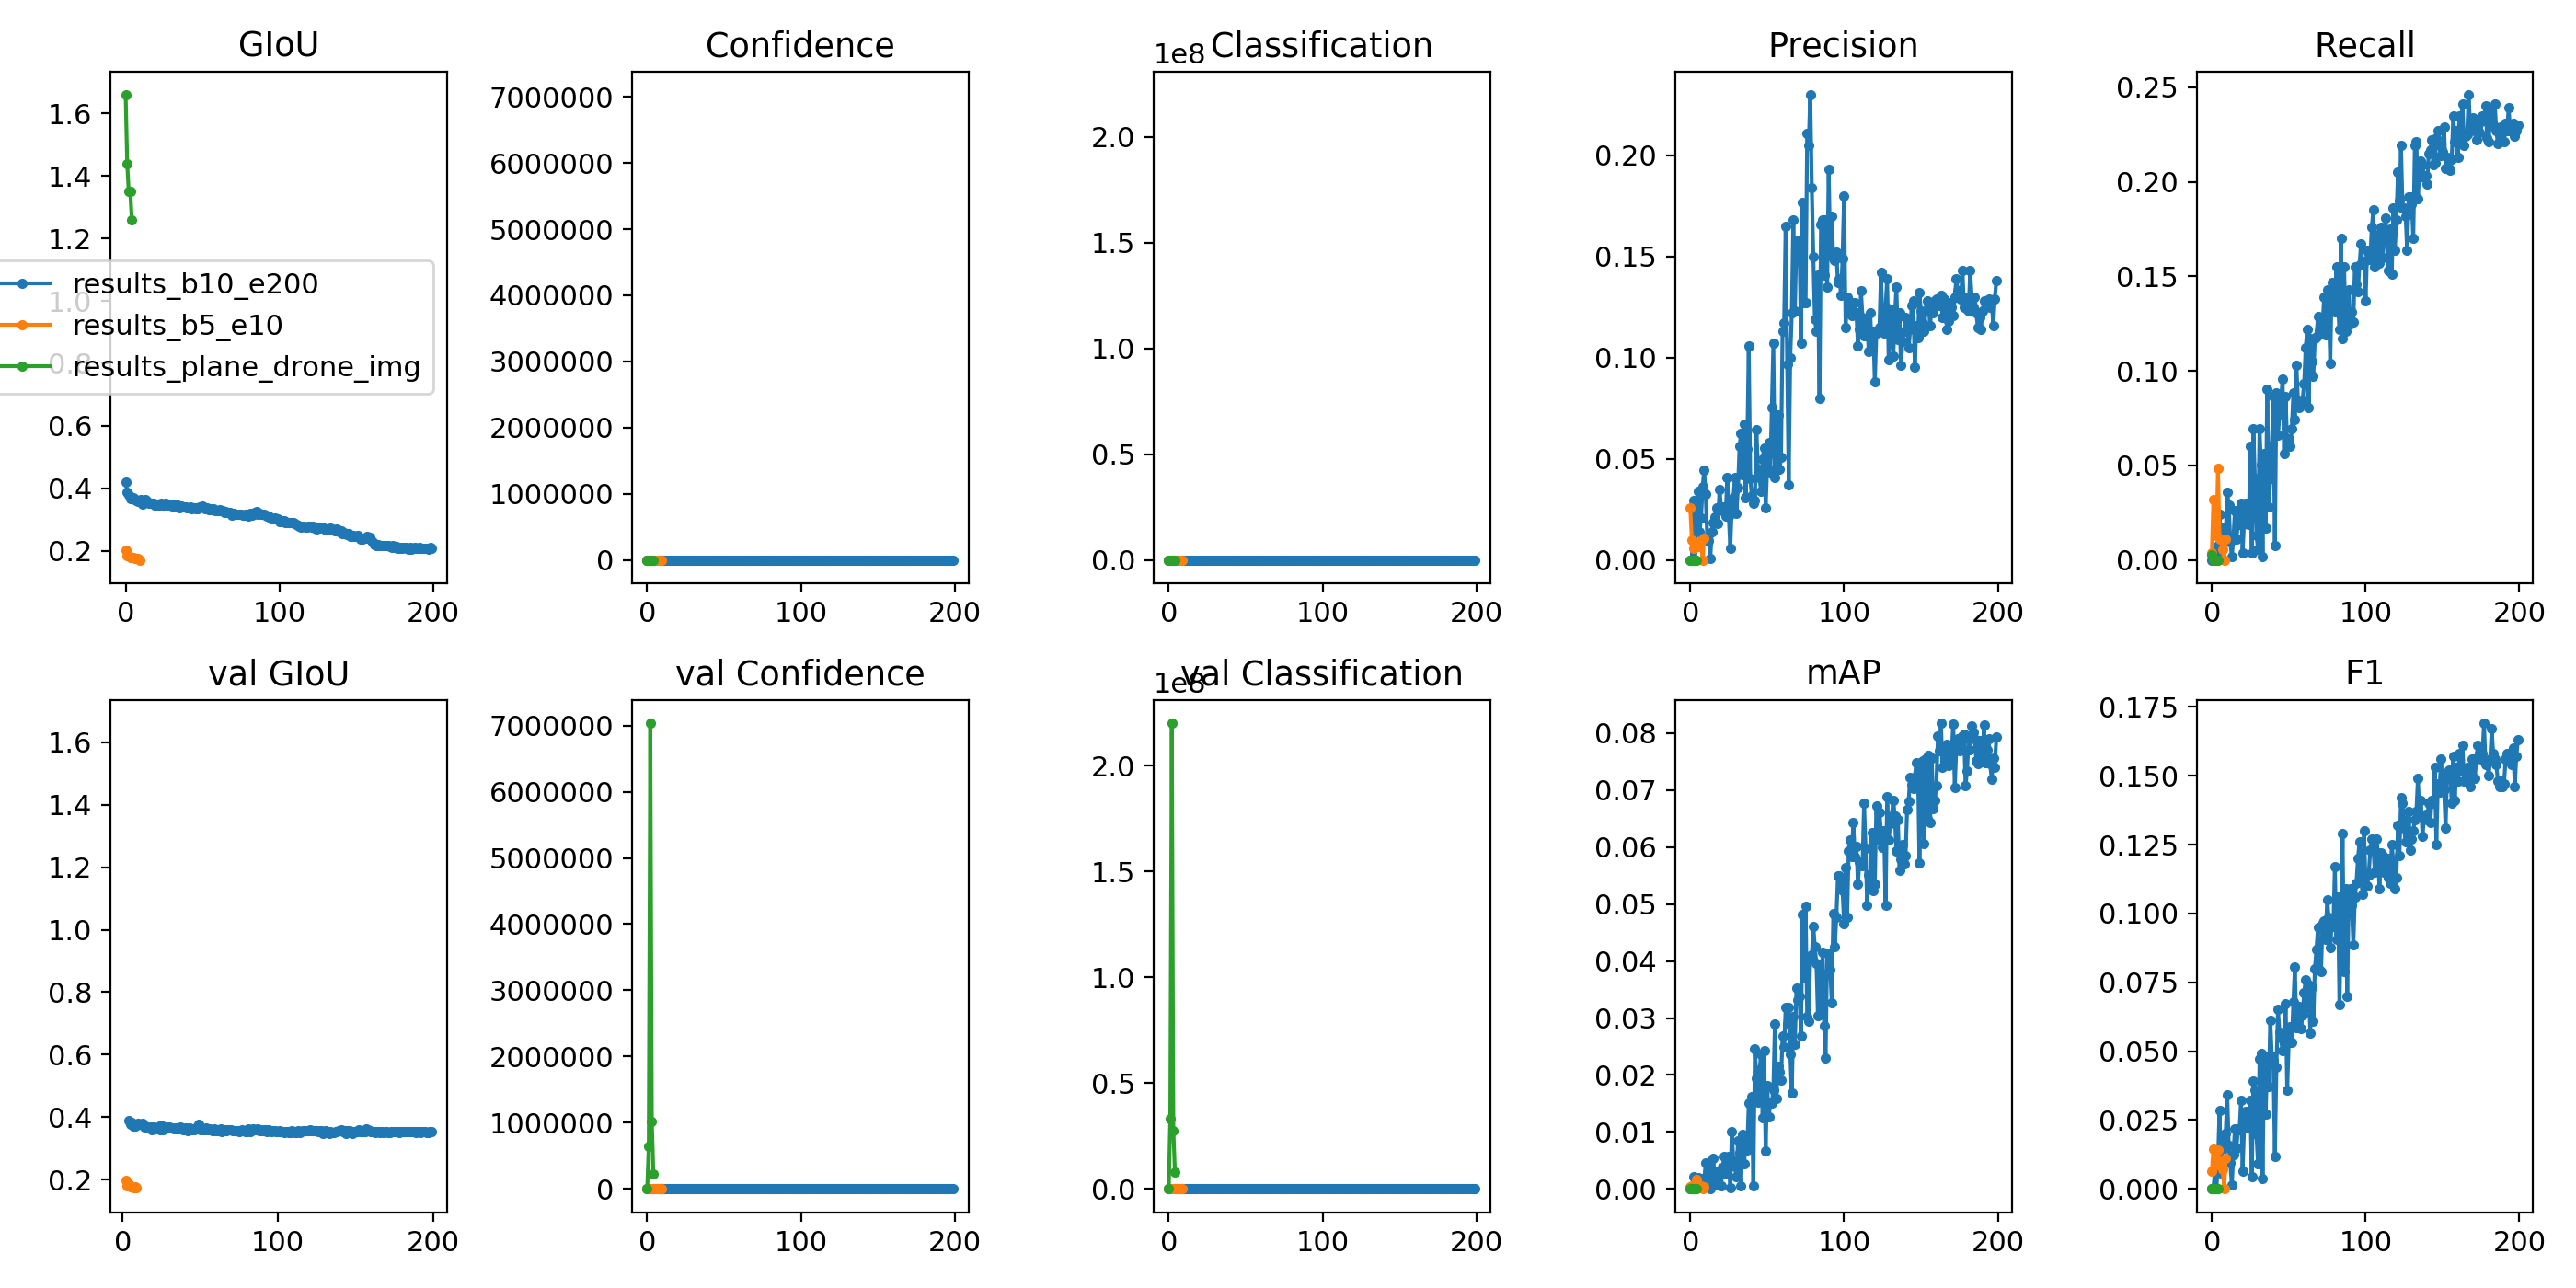

In [30]:
!sudo python3 -c "from utils import utils; utils.plot_results()"
Image(filename='results.png', width=800)

In [5]:
!python3 detect.py

Namespace(cfg='cfg/plane-drone.cfg', conf_thres=0.3, data='data/plane_drone_train_val.data', fourcc='mp4v', half=False, images='../drone-vs-plane/images/val-test-all', img_size=416, inference_output='inference_output', nms_thres=0.5, webcam=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

image 1/301 ../drone-vs-plane/images/val-test-all/351.jpg: Done. (0.031s)
image 2/301 ../drone-vs-plane/images/val-test-all/352.jpg: Done. (0.016s)
image 3/301 ../drone-vs-plane/images/val-test-all/353.jpg: Done. (0.017s)
image 4/301 ../drone-vs-plane/images/val-test-all/354.jpg: Done. (0.016s)
image 5/301 ../drone-vs-plane/images/val-test-all/355.jpg: Done. (0.018s)
image 6/301 ../drone-vs-plane/images/val-test-all/356.jpg: 256x416 3 airplanes, Done. (0.024s)
image 7/301 ../drone-vs-plane/images/val-test-all/357.jpg: Done. (0.017s)
image 8/301 ../drone-vs-plane/images/val-test-all/358.jpg: Done. (0.017s)
image 9/301 ../dron